<a href="https://colab.research.google.com/github/AlvaroCarrizales/Proyecto_inteligencia_artificial/blob/master/entrenamientoDiccionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import math as m
from matplotlib import pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras

In [128]:
y=[]
X=np.empty((0,288*432), int)
for punt in range(0,70):
  directorio="L%d.jpg" % (punt+1)
  a=cv2.imread(directorio)
  rgB=np.matrix(a[:,:,0])
  vector=np.reshape(rgB,(1,288*432))
  X=np.append(X,vector,axis=0)
print(X.shape)
y1 = [8,9,21,13,4,4,9,8,23,16,4,20,21,11,18,23,13,19,22,15,23,26,17,11,3,11,2,21,2,9,13,3,2,9,2,11,8,9,4,3,9,21,21,11,3,6,3,9,9,11,2,9,11,9,16,4,4,11,11,3,4,4,11,3,13,23,2,26,4,13]
yy = np.array(y1)
print(yy.shape)

(70, 124416)
(70,)


In [185]:
vector.shape

(1, 124416)

In [104]:
from sklearn.datasets import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
from sklearn.metrics import *

ERROR:root:File `'../code/utils.py'` not found.


In [0]:
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
est = GaussianNB()
Xtr, Xts, ytr, yts = train_test_split(X,yy, test_size=.5)
print(yts.shape)
print(Xts.shape)

(35,)
(35, 124416)


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
est = GaussianNB()
s = cross_val_score(est, X, yy, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s)
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.85714286 0.85714286 0.57142857 1.         0.42857143 1.
 1.         1.         0.71428571 0.71428571]
accuracy 0.814 (+/- 0.19219)


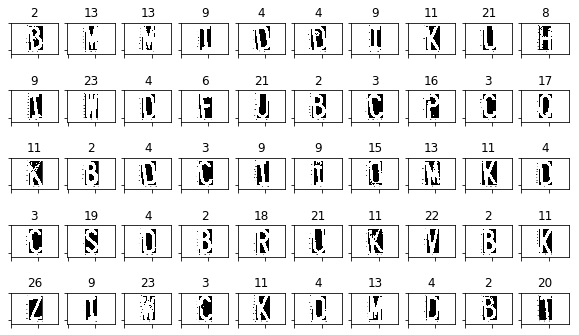

In [131]:
perm = np.random.permutation(range(Xts.shape[0]))[0:50]
#print X.shape[0]
#print perm
random_imgs   = Xts[perm]
random_labels = yts[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title((random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

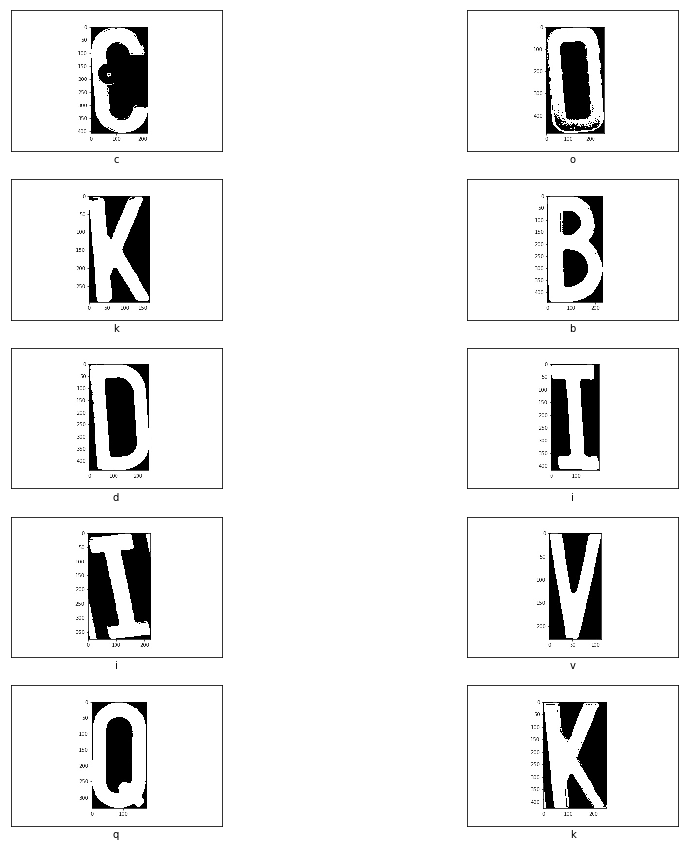

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
est = GaussianNB()
Xtr, Xts, ytr, yts = train_test_split(X,yy, test_size=.8)
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i' ,'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xts[i].reshape(288,432), interpolation="nearest", cmap = plt.cm.Greys_r)
    plt.xlabel(class_names[yts[i]-1])

In [187]:
#Xts.reshape([-1,288,432,1])
Xts.shape

(56, 124416)

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[288, 432, 1]),
    keras.layers.Dense(7488, activation=tf.nn.relu),
    keras.layers.Dense(26, activation=tf.nn.softmax)
])

In [170]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 124416)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 7488)              931634496 
_________________________________________________________________
dense_3 (Dense)              (None, 26)                194714    
Total params: 931,829,210
Trainable params: 931,829,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5)